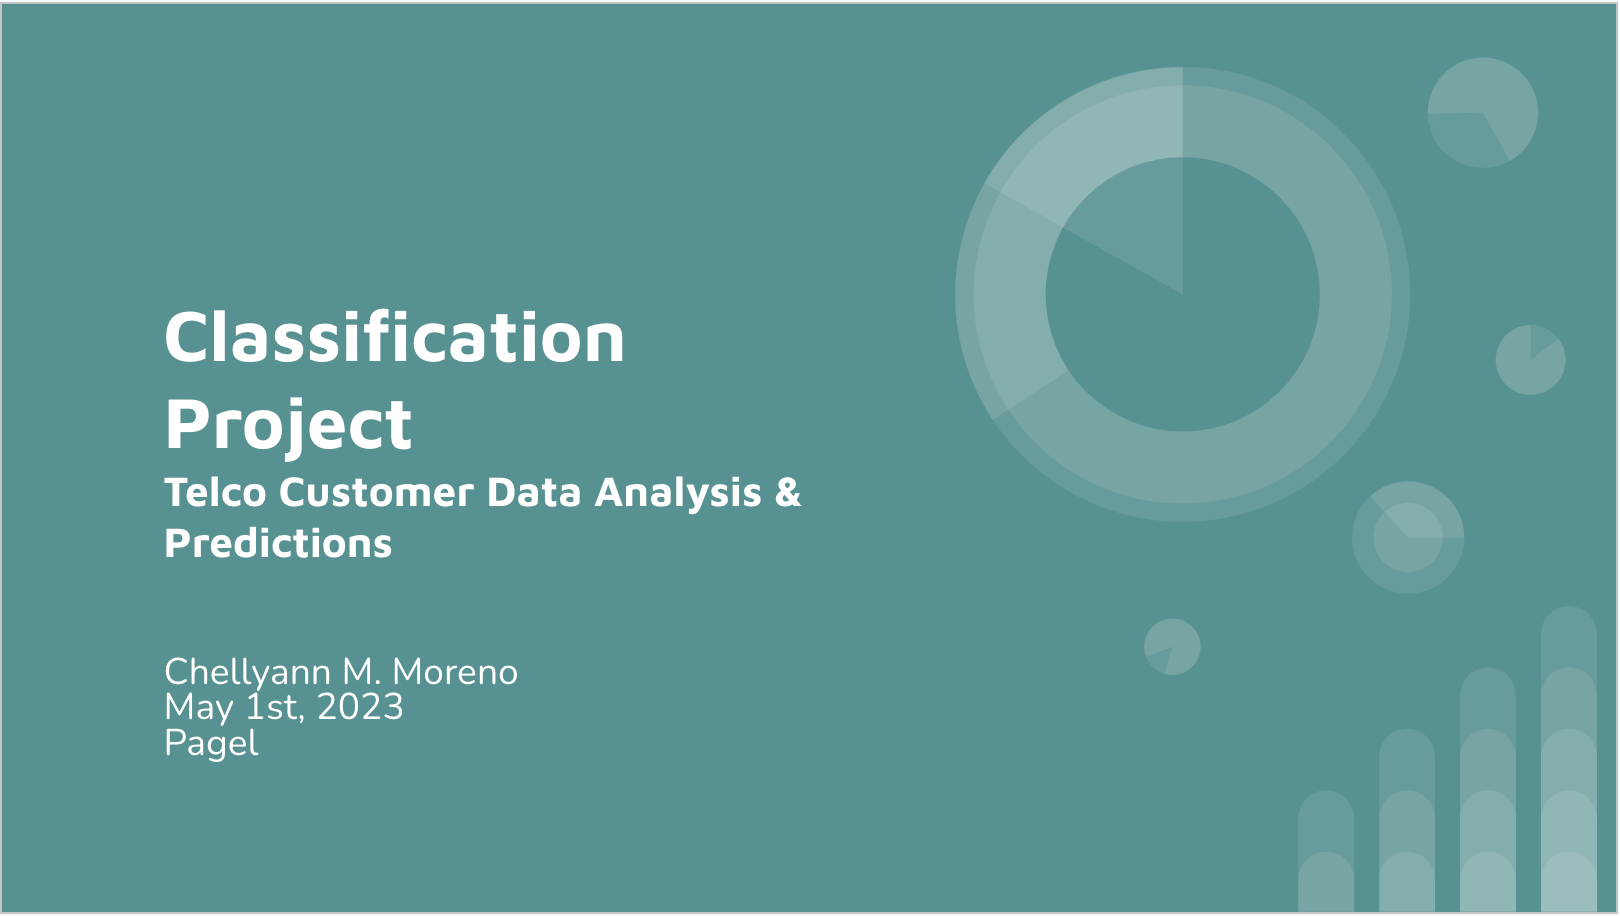

# Project Goals:
  - Analyze and explore the different factors why customers hace churned the company.
  - Create a machine learning model to predict churning rate.
  - Give intake and ideas on how to improve the company and reduce the customer churning rate. 

# Imports:

In [19]:
# Libraries working for arrays and dataframe
import numpy as np
import pandas as pd
# Used for Data Visualization and statistical tool
from scipy import stats
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt 
# Use for Machine Learning Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
# Ignore warnings 
import warnings
warnings.filterwarnings("ignore")
# Use to retrieve and clean the telco data
import acquire as acq
import prepare as prep
#use to import functions for the exploration and modeling telco data
import explore as ex
#setting alpha for the statistical test
alpha=0.05

# Acquire:
 - Telco Data was retrieved from the Codeup Database usin MySQL.
 - Joined 4 SQL tables, the original data contain: 58 columns and 7943 rows.
 - Each row represents one customer and each column represent a feature of their contract and service.
 

# Data Preparation:
 - No nulls were found.
 - Columns that were dropped:internet_service_type_id,contract_type_id,payment_type_id. The information in this       columns contain unecessary information.
 - The 'total_charge' column was converte from object/str to int64/numeric.
 - Columns with yes/no were turned in to 1/0
 - Encoded dummies columns were created and joined them to the original telco dataset.
 - Data was split into train(60%), validate(20%) and test(20%), using column 'churn' as the target variable.
 

In [2]:
#retriving data from SQL, preparing and cleaning data for exploration
telco=acq.get_telco_data()
telco=prep.prep_telco(telco)
# Data Split: train, validate, test
train,test,validate=prep.split_data(telco,'churn')

### Data summary & review:

In [3]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,no_contract,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,0,1,0,1,0,0,1,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,0,1,0,0,0,1,0,0,1,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,1,0,0,1,0,0,0,0,0,1
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,0,0,1,1,0,0,1,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,0,1,0,0,1,0,0,1,0,0


In [56]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,no_contract,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.161893,32.500828,65.056142,2298.513598,0.491361,0.488521,0.306272,0.906982,0.593846,0.265325,...,0.548402,0.216095,0.235503,0.342485,0.439053,0.218462,0.220828,0.217515,0.336805,0.224852
std,0.368397,24.532563,30.268493,2271.603284,0.499985,0.499927,0.460999,0.290492,0.491172,0.441559,...,0.497711,0.411628,0.424363,0.474597,0.496330,0.413251,0.414854,0.412604,0.472673,0.417534
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.650000,411.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.400000,1401.150000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.150000,3865.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
train.shape, validate.shape, test.shape

((4225, 58), (1409, 58), (1409, 58))

# Data Exploration:
 ### Questions:
 - Clients with no contract chrun more than clients with month-to month services?
 - Clients without dependent churn more than client with dependents?
 - Senior Citizen Clients tend to churn more than non-senior citizen clients?
 - Clients without tech support tend to churn more than clients with tech support? Does the internet service type      affects churning?
 ### Visualization and statistical test used:
 - barplot
 - chi square test
 - t-test 1 sample 2 tailed
 

## 1. Does clients with no contract churn more than clients contract services?

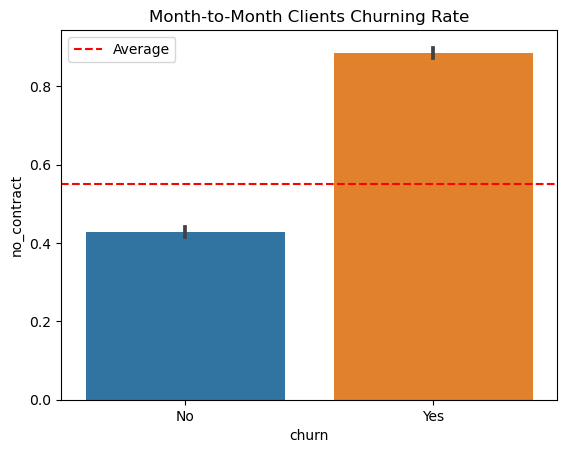

In [5]:
#function from the explore py file to create barplots
ex.create_barplot(telco,'churn','no_contract','Month-to-Month Clients Churning Rate')

### According to the plot, clients with a month to month service tend to churn more than clients with a one or two year contract.

## Stats Test: Chi Square
### Hypothesis:
  H_$0$ : Clients with a month to month service churn <= than customers with one or two year contract.
  
  H_$a$: Client with a month to month service churn > than the customer with one or two year contract.

In [6]:
#
observed=pd.crosstab(telco.churn,telco.no_contract)
# function to calculate the chi square 
ex.chi_square_test(observed)

Observed Contingency Table:
no_contract     0     1
churn                  
No           2954  2220
Yes           214  1655
Expected Contingency Table:
[[2327.30824933 2846.69175067]
 [ 840.69175067 1028.30824933]]
Chi-Square Test Statistic:
1153.971661109348
p-value:
6.147585925548493e-253
We reject the null hypothesis.


### Results:
 #### The null hypothesis has been rejected because the p-value is less than the alpha(0.05). This means that clients with a month-to-month contract tend to churn more than clients with a one or two year contract.

## 2. Clients without dependent churn more than client with dependents?

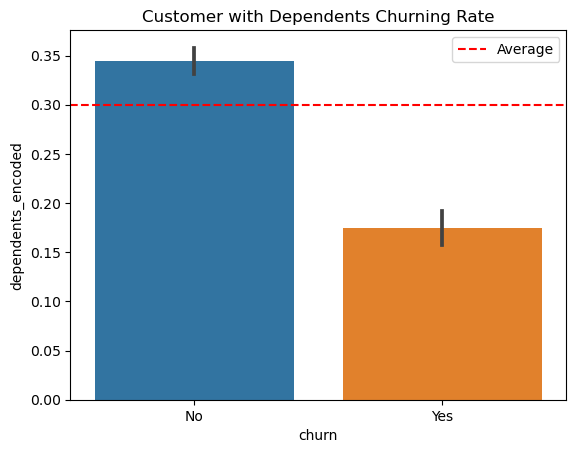

In [7]:
#function from the explore py file to create barplots
ex.create_barplot(telco,'churn','dependents_encoded','Customer with Dependents Churning Rate')

## Stats Test: Chi Square
### Hypothesis:
  H_$0$ : Clients with no dependents churn <= than customers with dependents.
  
  H_$a$: Client with no dependents churn > than the customer with dependents.

In [8]:
#
observed=pd.crosstab(telco.churn,telco.dependents)
# function to calculate the chi square 
ex.chi_square_test(observed)

Observed Contingency Table:
dependents    No   Yes
churn                 
No          3390  1784
Yes         1543   326
Expected Contingency Table:
[[3623.93042737 1550.06957263]
 [1309.06957263  559.93042737]]
Chi-Square Test Statistic:
189.12924940423474
p-value:
4.9249216612154196e-43
We reject the null hypothesis.


### Results:
 #### The null hypothesis has been rejected because the p-value is less than the alpha(0.05). This means that clients with no dependents tend to churn more than client with dependents.

# 3. Senior Citizen Clients tend to churn more than non-senior citizen clients?

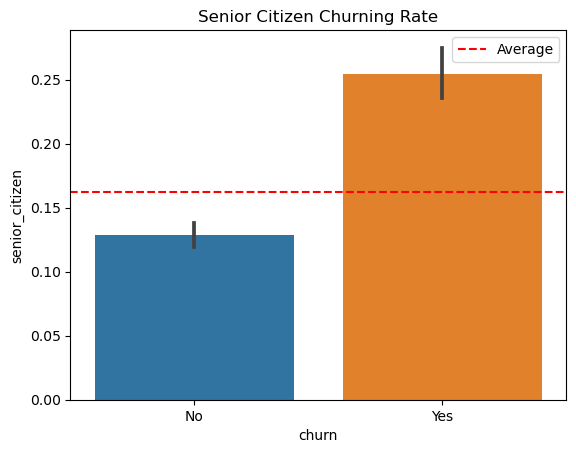

In [9]:
#function from the explore py file to create barplots
ex.create_barplot(telco,'churn','senior_citizen','Senior Citizen Churning Rate')

### Observations:
#### According to the plot senior citizen tend to churn more than clients who are not senior citizen.

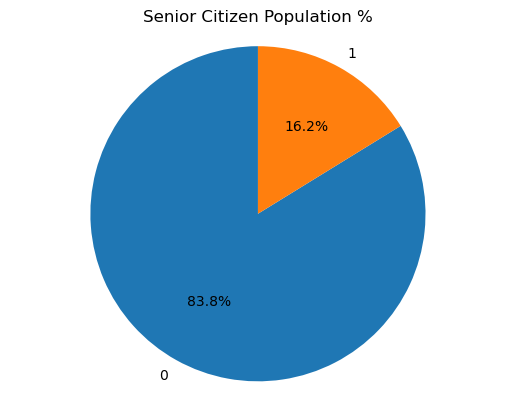

In [11]:
ex.create_pie_chart(telco,'senior_citizen','Senior Citizen Population %')

### Observations:
#### 16.2% of the customers are senior citizen. Even if senior citizen tend to churn the most, they are not majority of the customers. 
-Senior citizen may not affect the churning rate as much as non-senior_citizen.

# 4. Clients without tech support tend to churn more than clients with tech support?

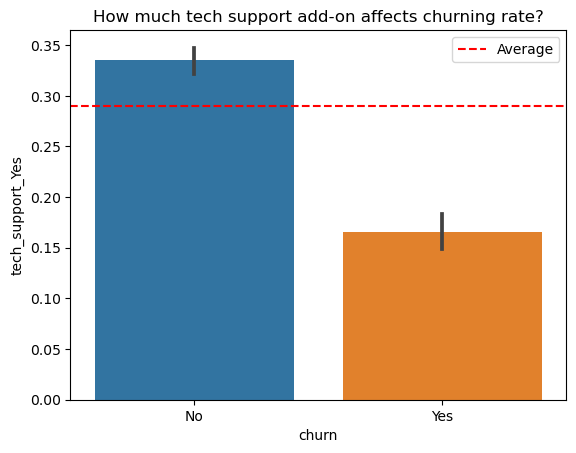

In [14]:
ex.create_barplot(telco,'churn','tech_support_Yes', "How much tech support add-on affects churning rate?")

### Observation:
 #### Clients without tech support tend to churn more thant clients with tech support?

## 4a. Does the internet service type affects the tech support/churning?

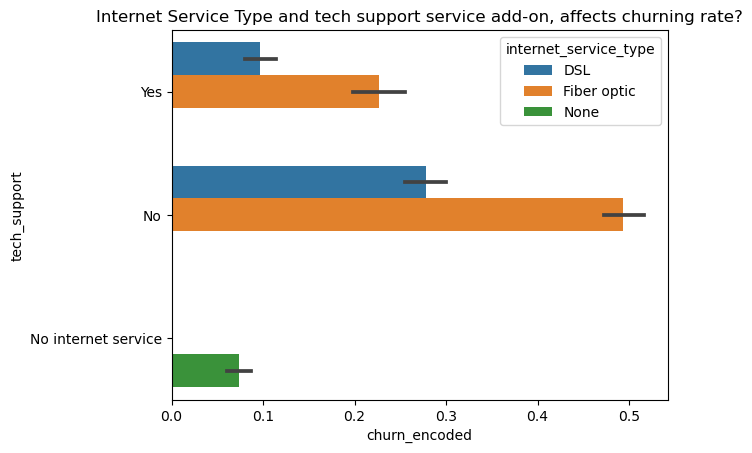

In [16]:
sns.barplot(data=telco,x='churn_encoded',y='tech_support',hue="internet_service_type")
plt.title('Internet Service Type and tech support service add-on, affects churning rate?')
plt.show()

### Observation:
 ##### Clients with fiber optic and no tech support services tend to churn at a higher rate.

# Exploration summary:
- Clients with month-to-month contract tend to churn more than client with a contract.
- Clients with no dependents tend to churn more than clients with dependents.
- Senior Citizen clients tend to churn more thant non-senior citizen clients. However, the senior citizen population consist of 16.2% of the entire customer population.
- Clients with no tech support tend to churn more than clients with tech support.
- Clients with no tech support and fiber optic internet tend to churn at a higher rate.


# Data Modeling:

   ### Introduction:
   - We would be looking to analyze and predict customers whou have a high chance on leaving the company(churning). 
   - Our baseline prediction will be that customer will not churn(churn=0).
   - Three different models would be used to score the train and validate data.
   - Best model out of the three will be used to score the test data, and to formulate our prediction.

In [23]:
# This will  find our baseline to use  as a guide during our modeling step.
baseline = [0] * len(telco)
print(f'The baseline prediction has and accuracy of:{(telco.churn_encoded == baseline).mean():.2%}')

The baseline prediction has and accuracy of:73.46%


#### Our baseline prediction have 73.46% chance of the customer not churning.

In [25]:
#preparing data to fit the x,y axis for train, validate and test data
x_train=telco[['monthly_charges','senior_citizen','dependents_encoded','tech_support_No','no_contract']]
y_train=telco.churn_encoded
x_validate=telco[['monthly_charges','senior_citizen','dependents_encoded','tech_support_No','no_contract']]
y_validate=telco.churn_encoded
x_test=telco[['monthly_charges','senior_citizen','dependents_encoded','tech_support_No','no_contract']]
y_test=telco.churn_encoded

## Models:
  1. Decistion Tree(max_depth = 4)
  2. K-Nearest Neighbors()
  3. Logistic Regression

### 1. Decision Tree model:

In [29]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100

77.12622462019027

In [40]:
dt.score(x_validate,y_validate)*100

77.12622462019027

### 2. K-Nearest Neighbor model:

In [43]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100

82.2802782905012

In [44]:
knn.score(x_validate,y_validate)*100

82.2802782905012

# 3. Logistic Regression:

In [45]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100

76.58668181172796

## Modeling using the data test:
- The KNeighbors Classfier would be use for our data test.
- The KNeighbors scored ~82% with our train and validate data.

In [46]:
knn.score(x_test,y_test)*100

82.2802782905012

## Modeling conclusion:
- Out of the three models, the KNN model performed the best, going above the the baseline 9% higher chance of costumer not churning.
- However all the models did perform above the baseline level of 73%.

# Conclusion:

## Summary:
- Customers with access to tech support tend to stay at the company.
- Customers with dependents and/or add-ons have a lower chance of churning.
- Senior citizens tend to churn more, however the senior citizen population is low.
- Customers with a month to month contract tend to churn at a higher rate than those with a one or two year contract.

## Recommendations:
- Based on our observations, we recomment using the machine model to identify customers who are have a high probablity of churning and offer them tech support services, discounts and free add-ons to keep them from churning. 

## Next Steps:
 - Given more time more research should be done with customers having extra add-ons (streaming services, protections, tech support), to find if these features alltogether have an impact on customer churning. 
 - We could also look at different hypermaters and features to better the machine modeling percentage of accuracy.

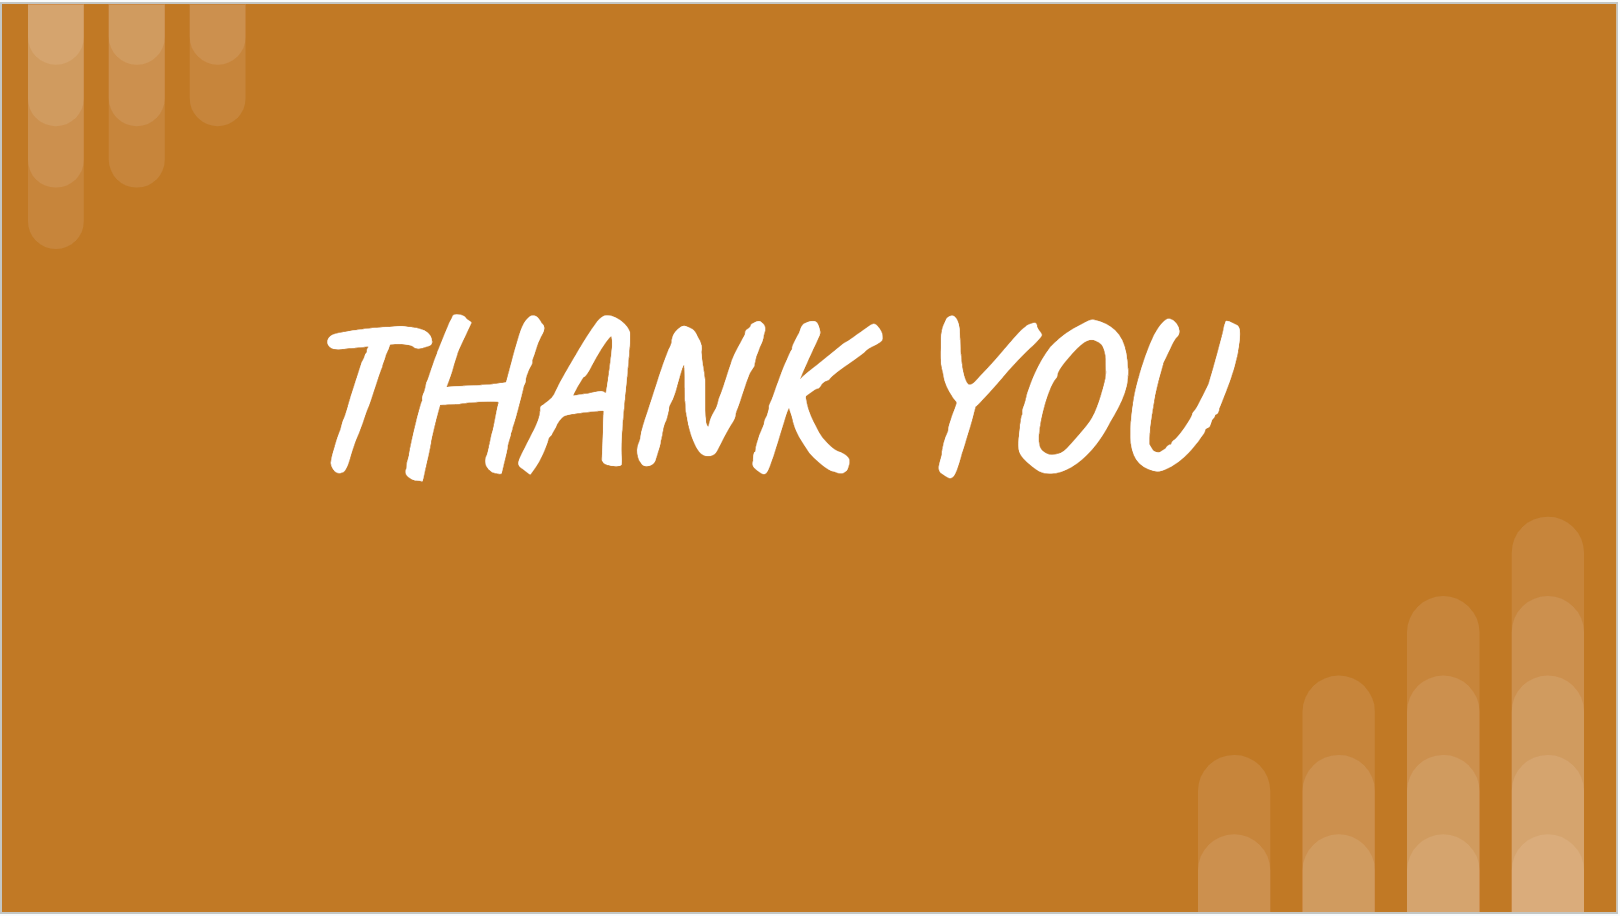